# Outlier removal using standard deviation and z score

**Problem:** From a given dataset containing property prices in the city of banglore, India examine price_per_sqft column and do following:

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("C:\\Users\\asus\\Desktop\\DS_Rep\\ML\\FeatureEngineering\\2_outliers_z_score\\Exercise\\bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [38]:
df.shape

(13200, 7)

In [39]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


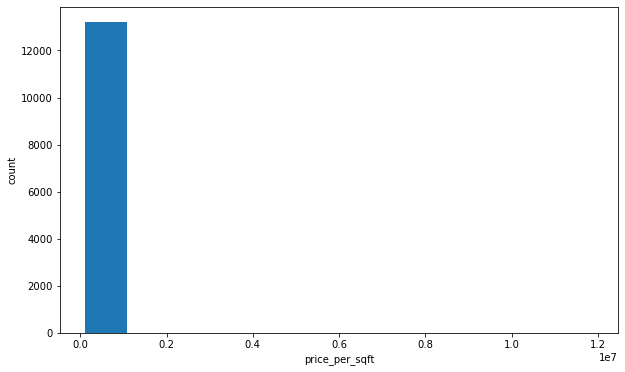

In [40]:
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.hist(df.price_per_sqft, bins = 10, rwidth = 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

Above chart confirms that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

An alternate approach could be using log scale to make visualization little better.

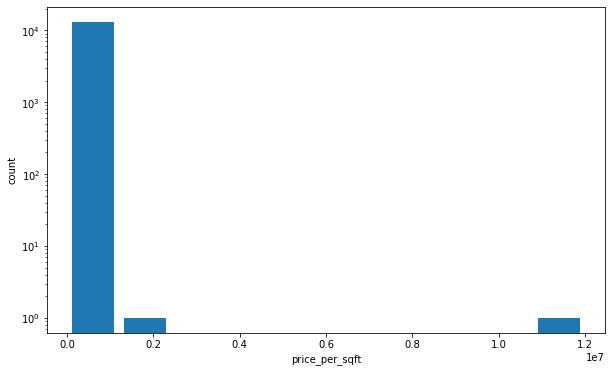

In [41]:
plt.hist(df.price_per_sqft, bins = 10, rwidth = 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

Now we can see the data points on the right hand side.

Removing Outliers using **percentile technique**. The lower limit will be 0.1 % and upper limit be 99.9%.

In [42]:
df.price_per_sqft.quantile(0.999)

50959.36200000099

In [43]:
up_limit = df.price_per_sqft.quantile(0.999)

In [44]:
df.price_per_sqft.quantile(0.001)

1366.184

In [45]:
low_limit = df.price_per_sqft.quantile(0.001)

To check which data points lie beyond our chosen range of 0.1%ile and 99.9%ile

In [46]:
df[(df.price_per_sqft<low_limit) | (df.price_per_sqft>up_limit)]    #OUTLIERS

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Dropping these observations and obatin a new df

In [47]:
df1 = df[(df.price_per_sqft > low_limit) & (df.price_per_sqft < up_limit)]
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [48]:
df1.shape

(13172, 7)

In [49]:
df.shape[0] - df1.shape[0]

28

In [62]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


**So after the first step of Outlier Removal by percentile 28 rows/observations/datapoints got eliminated as outliers.**

Now proceeding for the next part. i.e handling Outliers by 4 Std Deviation. For that we have to calculate the Std devaition and before that plot the histogram to see if it follows bell Curve or Normal Distribution.

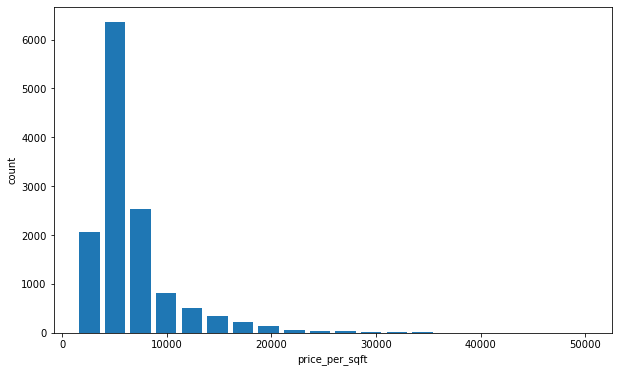

In [50]:
plt.hist(df1.price_per_sqft, bins =20, rwidth = 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

to draw a bell curve around the histogram

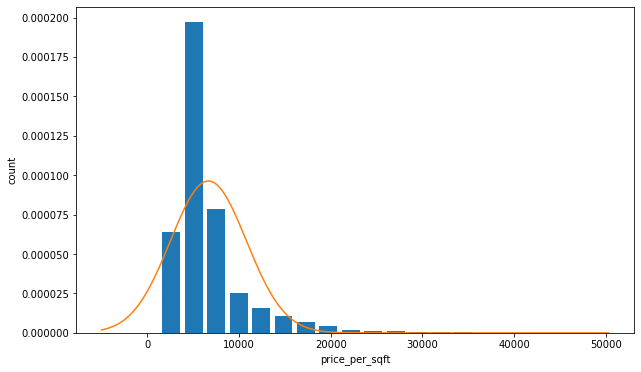

In [61]:
from scipy.stats import norm
import numpy as np

plt.hist(df1.price_per_sqft, bins =20, rwidth = 0.8, density = True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

rng = np.arange(-5000, df1.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df1.price_per_sqft.mean(), df1.price_per_sqft.std()))

Setting the min and max limit for data points range for handling Outliers by 4 Std Deviation.

In [63]:
max_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
max_limit

23227.73653589429

In [64]:
min_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
min_limit

-9900.429065502549

To see the Outliers i.e Datapoints which doesn't lie in this min and max limit.

In [65]:
df1[(df1.price_per_sqft < min_limit) | (df1.price_per_sqft > max_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


Dropping these outliers and obtaining a new df.

In [66]:
df2 = df1[(df1.price_per_sqft > min_limit) & (df1.price_per_sqft < max_limit)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [67]:
df2.shape

(13047, 7)

In [68]:
df1.shape[0] - df2.shape[0]

125

**Total 125 rows got dropped after this step.**

In [69]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


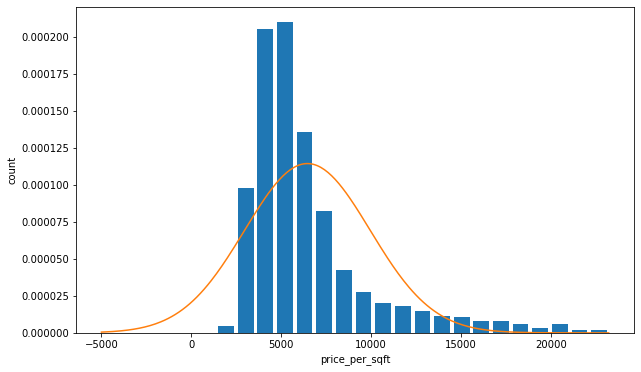

In [76]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.price_per_sqft, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

rng = np.arange(-5000, df2.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df2.price_per_sqft.mean(), df2.price_per_sqft.std()))

Now removing outliers using **Z score** Using z score of 4 as the thresold. For tahat first we have to manke a new column in the df for putting the z score of respective datapoints.

In [80]:
df1['Z_Score'] = (df1.price_per_sqft - df1.price_per_sqft.mean())/df1.price_per_sqft.std()
df1.head()

<ipython-input-80-46af7a2e2841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Z_Score'] = (df1.price_per_sqft - df1.price_per_sqft.mean())/df1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [81]:
outliers = df1[(df1.Z_Score < -4) | (df1.Z_Score > 4)]
outliers.shape

(125, 8)

In [82]:
outliers.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
7808,other,5 Bedroom,2400.0,5.0,625.0,5,26041,4.679365
6597,other,2 BHK,1030.0,2.0,300.0,2,29126,5.424350
3401,Indira Nagar,6 Bedroom,2480.0,4.0,750.0,6,30241,5.693607
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750,4.126120
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166,5.434010


In [83]:
df3 = df1[(df1.Z_Score > -4) & (df1.Z_Score < 4)]
df3.shape

(13047, 8)

In [84]:
df1.shape[0] - df3.shape[0]

125

**125 rows removed after handling outlier**. We can see clearly that Z score method gave the same result as std dev method for same data set.